In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

In [2]:
proyectos = read_csv("data/mapeo_proyectos.csv")

In [7]:
proyectos["Financiación"] = pd.to_numeric(proyectos["Financiación"], errors='coerce')

# Cómo ha evolucionado la financiación en el tiempo:

In [43]:
grouped = proyectos.groupby("Temporalización (inicio)", as_index=False)
df2 = grouped.agg({'Financiación':['sum', 'mean', 'count']})
df2.columns = ["inicio", "sum", "mean", "count"]
df2

,inicio,sum,mean,count
0,1993,16828.0,16828.000000,1
1,1995,99465.0,33155.000000,3
2,1996,172191.0,57397.000000,3
3,1998,40238.0,40238.000000,1
4,1999,55894.0,55894.000000,1
5,2000,30050.0,30050.000000,1
6,2003,85880.0,85880.000000,1
7,2004,278300.0,34787.500000,8
8,2005,281710.0,46951.666667,6
9,2006,498390.0,45308.181818,11


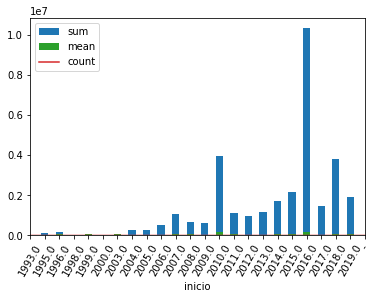

In [67]:

ax = df2.plot(x="inicio", y="sum", kind="bar")
df2.plot(x="inicio", y="mean", kind="bar", ax=ax, color="C2")
df2.plot(x="inicio", y="count", ax=ax, color="C3")
plt.xticks(rotation=60)
plt.show()


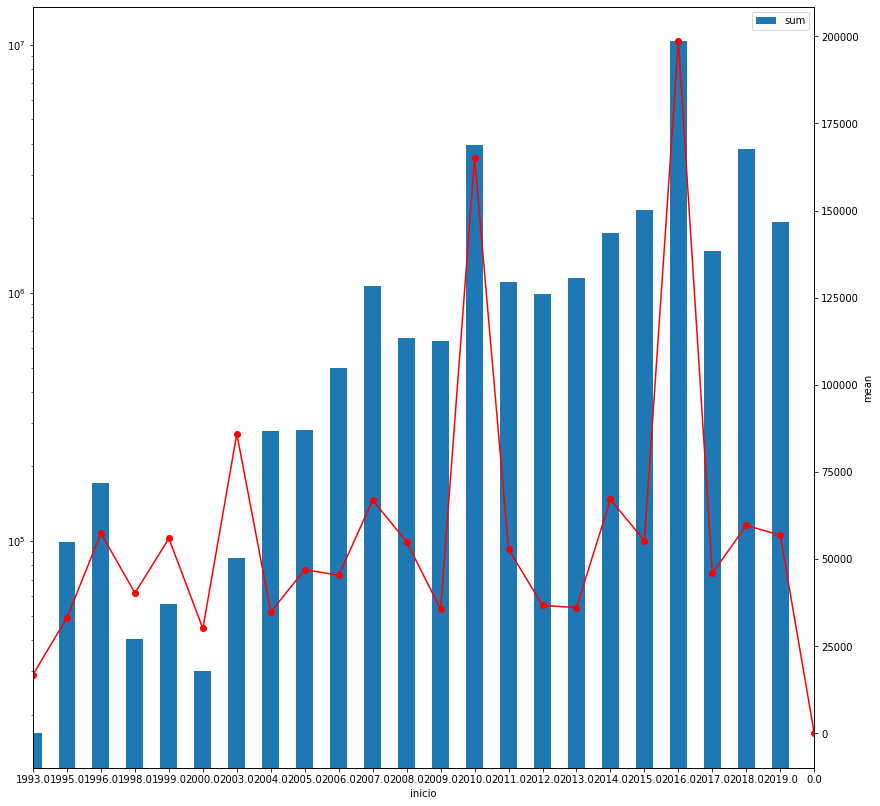

In [97]:
df2['inicio'] = pd.to_numeric(df2['inicio'], errors='coerce')
df2 = df2.fillna(0)

df2.astype({'inicio': 'int32'}).dtypes


df2.plot(x="inicio", y="sum", kind="bar", figsize=(14,14), logy=True)

ax = df2['mean'].plot(secondary_y=True, color='r', marker='o')
ax.set_ylabel('mean')

plt.xticks(rotation='vertical')
plt.show()

